In [1]:
import pandas as pd
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from astropy.nddata.utils import Cutout2D
from astropy.coordinates import SkyCoord
import pdb
import matplotlib.pyplot as plt
import h5py    
import pandas as pd

import sklearn
print(sklearn.__version__)

import seaborn as sns

1.1.2


In [2]:
data_path = "/Users/marchuertascompany/Documents/data/CEERS/stellarpops/"
ceers_cat = pd.read_csv(data_path+"CEERS_DR05_adversarial_asinh_3filters_1122_4class_ensemble_v02_stellar_params.csv")
candels_ceers = pd.read_csv(data_path+"CANDELS_CEERS_match_DR05_ensemble.csv")

In [3]:
filters = ['f200w','f356w','f444w']
morph=['sph','disk','irr','bd']

for f in filters:
    for m in morph:
        c = ceers_cat.filter(regex='^'+m+'_')
        c = c.filter(regex=f+'$')
        ceers_cat[m+'_'+f+'_mean']=c.mean(axis=1).values
        ceers_cat[m+'_'+f+'_std']=c.std(axis=1).values


filters = ['f200w','f356w','f444w']
morph=['sph','disk','irr','bd']

for f in filters:
    for m in morph:
        c = candels_ceers.filter(regex='^'+m+'_')
        c = c.filter(regex=f+'$')
        candels_ceers[m+'_'+f+'_mean']=c.mean(axis=1).values
        candels_ceers[m+'_'+f+'_std']=c.std(axis=1).values        
#print(c.mean(axis=1))
#print(c.std(axis=1))
#c=ceers_cat[ceers_cat.name.str.match('sph*f200w')]
#print(c.columns)

In [53]:
print(ceers_cat.columns)

Index(['fullname', 'sph_0_f200w', 'disk_0_f200w', 'irr_0_f200w', 'bd_0_f200w',
       'sph_1_f200w', 'disk_1_f200w', 'irr_1_f200w', 'bd_1_f200w',
       'sph_2_f200w',
       ...
       'bd_f356w_mean', 'bd_f356w_std', 'sph_f444w_mean', 'sph_f444w_std',
       'disk_f444w_mean', 'disk_f444w_std', 'irr_f444w_mean', 'irr_f444w_std',
       'bd_f444w_mean', 'bd_f444w_std'],
      dtype='object', length=218)


In [4]:





morph_flag=[]
delta_value = []

for sph,dk,irr,bd in zip(ceers_cat.sph_f356w_mean,ceers_cat.disk_f356w_mean,ceers_cat.irr_f356w_mean,ceers_cat.bd_f356w_mean):
    maxpos = np.argmax([sph,dk,irr,bd])
    delta = np.sort([sph,dk,irr,bd])[3]-np.sort([sph,dk,irr,bd])[2]
    morph_flag.append(maxpos)
    delta_value.append(delta)
    
#morph_flag=np.array(morph_flag)
#morph_flag[(ceers_cat.disk_f356>0.3)]=1
#morph_flag[(ceers_cat.irr_f356>0.3) & (ceers_cat.sph_f356>0.3)]=3
ceers_cat['morph_flag_f356w']=np.array(morph_flag)
ceers_cat['delta_f356']=np.array(delta_value)

morph_flag=[]
delta_value = []

for sph,dk,irr,bd in zip(ceers_cat.sph_f200w_mean,ceers_cat.disk_f200w_mean,ceers_cat.irr_f200w_mean,ceers_cat.bd_f200w_mean):
    maxpos = np.argmax([sph,dk,irr,bd])
    delta = np.sort([sph,dk,irr,bd])[3]-np.sort([sph,dk,irr,bd])[2]
    morph_flag.append(maxpos)
    delta_value.append(delta)
#morph_flag=np.array(morph_flag)
#morph_flag[(ceers_cat.disk_f200>0.3)]=1    
ceers_cat['morph_flag_f200w']=np.array(morph_flag)
ceers_cat['delta_f200']=np.array(delta_value)

morph_flag=[]
delta_value = []

for sph,dk,irr,bd in zip(ceers_cat.sph_f444w_mean,ceers_cat.disk_f444w_mean,ceers_cat.irr_f444w_mean,ceers_cat.bd_f444w_mean):
    maxpos = np.argmax([sph,dk,irr,bd])
    delta = np.sort([sph,dk,irr,bd])[3]-np.sort([sph,dk,irr,bd])[2]
    morph_flag.append(maxpos)
    delta_value.append(delta)
#morph_flag=np.array(morph_flag)
#morph_flag[(ceers_cat.disk_f200>0.3)]=1    
ceers_cat['morph_flag_f444w']=np.array(morph_flag)
ceers_cat['delta_f444']=np.array(delta_value)

ceers_cat.to_csv(data_path+"CEERS_DR05_adversarial_asinh_3filters_1122_4class_ensemble_v02_stellar_params_morphflag_delta.csv")

In [5]:
morph_flag=[]

for fsph,fdk,firr in zip(candels_ceers.F_SPHEROID,candels_ceers.F_DISK,candels_ceers.F_IRR):
    
     if (fsph>=0.66 and fdk<0.66 and firr<0.1):
        morph_flag.append(0)
     elif (fsph<0.66 and fdk>=0.66 and firr<0.1):
        morph_flag.append(1)
     elif (firr>=0.1):
        morph_flag.append(2)   
     elif (fsph>0.66 and fdk>0.66 and firr<0.1):
        morph_flag.append(3)            
     else:
        morph_flag.append(-1)  
    
candels_ceers['morph_CANDELS']=np.array(morph_flag)

morph_flag=[]
delta_value = []

for sph,dk,irr,bd in zip(candels_ceers.sph_f356w_mean,candels_ceers.disk_f356w_mean,candels_ceers.irr_f356w_mean,candels_ceers.bd_f356w_mean):
    maxpos = np.argmax([sph,dk,irr,bd])
    delta = np.sort([sph,dk,irr,bd])[3]-np.sort([sph,dk,irr,bd])[2]
    morph_flag.append(maxpos)
    delta_value.append(delta)
    
#morph_flag=np.array(morph_flag)
#morph_flag[(ceers_cat.disk_f356>0.3)]=1
#morph_flag[(ceers_cat.irr_f356>0.3) & (ceers_cat.sph_f356>0.3)]=3
candels_ceers['morph_flag_f356w']=np.array(morph_flag)
candels_ceers['delta_f356']=np.array(delta_value)

morph_flag=[]
delta_value = []

for sph,dk,irr,bd in zip(candels_ceers.sph_f200w_mean,candels_ceers.disk_f200w_mean,candels_ceers.irr_f200w_mean,candels_ceers.bd_f200w_mean):
    maxpos = np.argmax([sph,dk,irr,bd])
    delta = np.sort([sph,dk,irr,bd])[3]-np.sort([sph,dk,irr,bd])[2]
    morph_flag.append(maxpos)
    delta_value.append(delta)
#morph_flag=np.array(morph_flag)
#morph_flag[(ceers_cat.disk_f200>0.3)]=1    
candels_ceers['morph_flag_f200w']=np.array(morph_flag)
candels_ceers['delta_f200']=np.array(delta_value)

morph_flag=[]
delta_value = []

for sph,dk,irr,bd in zip(candels_ceers.sph_f444w_mean,candels_ceers.disk_f444w_mean,candels_ceers.irr_f444w_mean,candels_ceers.bd_f444w_mean):
    maxpos = np.argmax([sph,dk,irr,bd])
    delta = np.sort([sph,dk,irr,bd])[3]-np.sort([sph,dk,irr,bd])[2]
    morph_flag.append(maxpos)
    delta_value.append(delta)
#morph_flag=np.array(morph_flag)
#morph_flag[(ceers_cat.disk_f200>0.3)]=1    
candels_ceers['morph_flag_f444w']=np.array(morph_flag)
candels_ceers['delta_f444']=np.array(delta_value)


candels_ceers.to_csv(data_path+"CANDELS_CEERS_match_DR05_ensemble_morphflag.csv")

(array([ 102.,   94.,  129.,  118.,  126.,  144.,  163.,  191.,  346.,
        4692.]),
 array([0.00129806, 0.10116825, 0.20103845, 0.30090864, 0.40077884,
        0.50064903, 0.60051922, 0.70038942, 0.80025961, 0.90012981,
        1.        ]),
 <BarContainer object of 10 artists>)

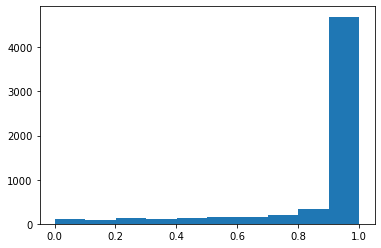

In [30]:
plt.hist(ceers_cat.delta_f356)

In [6]:
morph_flag=[]

for fsph,fdk,firr in zip(candels_ceers.F_SPHEROID,candels_ceers.F_DISK,candels_ceers.F_IRR):
    
     if (fsph>=0.66 and fdk<0.66 and firr<0.1):
        morph_flag.append(0)
     elif (fsph<0.66 and fdk>=0.66 and firr<0.1):
        morph_flag.append(1)
     elif (firr>=0.1):
        morph_flag.append(2)   
     elif (fsph>0.66 and fdk>0.66 and firr<0.1):
        morph_flag.append(3)            
     else:
        morph_flag.append(-1)  
    
candels_ceers['morph_CANDELS']=np.array(morph_flag)

morph_flag=[]

for sph,dk,irr,bd in zip(candels_ceers.sph_200,candels_ceers.disk_200,candels_ceers.irr_200,candels_ceers.bd_200):
    maxpos = np.argmax([sph,dk,irr,bd])
    morph_flag.append(maxpos)
  
candels_ceers['morph_flag_f200w']=np.array(morph_flag)

morph_flag=[]
for sph,dk,irr,bd in zip(candels_ceers.sph_356,candels_ceers.disk_356,candels_ceers.irr_356,candels_ceers.bd_356):
    maxpos = np.argmax([sph,dk,irr,bd])
    morph_flag.append(maxpos)
  
candels_ceers['morph_flag_f356w']=np.array(morph_flag)

morph_flag=[]
for sph,dk,irr,bd in zip(candels_ceers.sph_444,candels_ceers.disk_444,candels_ceers.irr_444,candels_ceers.bd_444):
    maxpos = np.argmax([sph,dk,irr,bd])
    morph_flag.append(maxpos)
  
candels_ceers['morph_flag_f444w']=np.array(morph_flag)


candels_ceers.to_csv(data_path+"CANDELS_CEERS_match_morphflag_DR05.csv")

AttributeError: 'DataFrame' object has no attribute 'sph_200'

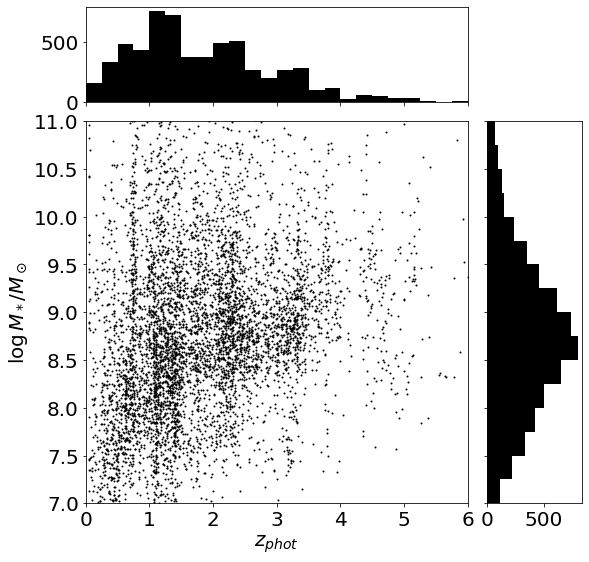

In [96]:
def scatter_hist(x, y, ax, ax_histx, ax_histy,lim_x,lim_y):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)
    ax_histx.tick_params(axis='y', labelsize=20)
    ax_histy.tick_params(axis='x', labelsize=20)

    # the scatter plot:
    ax.scatter(x, y,s=1,color='black')

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins_x= np.arange(-lim_x[0], lim_x[1] + binwidth, binwidth)
    bins_y= np.arange(-lim_y[0], lim_y[1] + binwidth, binwidth)
    ax_histx.hist(x, bins=bins_x,color='black')
    ax_histy.hist(y, bins=bins_y, orientation='horizontal',color='black')



fig = plt.figure()
fig.set_size_inches(8.5, 8.5)
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
plt.xlim(0,6)
plt.ylim(7,11)
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20, rotation=0)
plt.xlabel("$z_{phot}$",fontsize=20)
plt.ylabel("$\log M_*/M_\odot$",fontsize=20)
#ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
#ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
# Draw the scatter plot and marginals.
scatter_hist(ceers_cat.rb_z, ceers_cat.rb_synth_Mass_me_solar_exp, ax, ax_histx, ax_histy,[0,6],[7,11])



#plt.scatter(ceers_cat.rb_z,ceers_cat.rb_synth_Mass_me_solar_exp,s=1,color='black')
#plt.tight_layout()
plt.savefig(data_path+"mass_z.png",bbox_inches='tight')

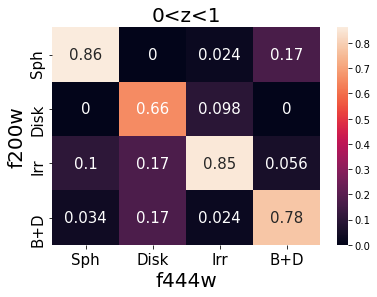

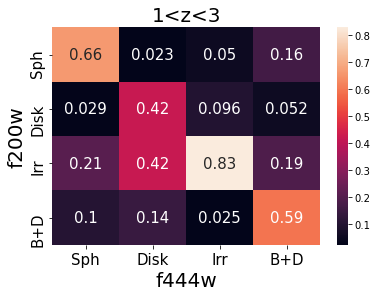

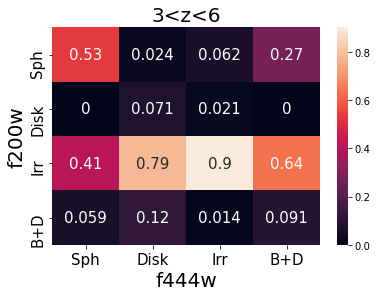

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("rb_synth_Mass_me_solar_exp>9.5 and rb_z>"+str(zlow)+"and rb_z<"+str(zup))


    cm = confusion_matrix(sel.morph_flag_f200w, sel.morph_flag_f444w,normalize='pred')
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Sph","Disk","Irr"])


    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax,annot_kws={"size": 15});  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('f444w',fontsize=20);ax.set_ylabel('f200w',fontsize=20); 
    #ax.set_title('Confusion Matrix'); 
    ax.set_title(str(zlow)+"<z<"+str(zup),fontsize=20)
    ax.xaxis.set_ticklabels(["Sph","Disk","Irr","B+D"],fontsize=15); ax.yaxis.set_ticklabels(["Sph","Disk","Irr","B+D"],fontsize=15)
    plt.savefig(data_path+"confmatrix_"+str(zlow)+"f200_f444.png")
    plt.show()
   

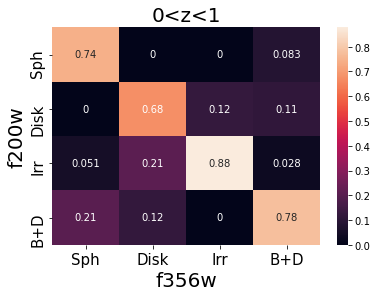

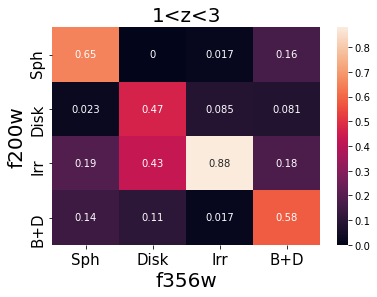

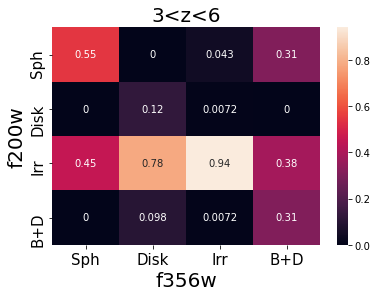

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("rb_synth_Mass_me_solar_exp>9.5 and rb_z>"+str(zlow)+"and rb_z<"+str(zup))


    cm = confusion_matrix(sel.morph_flag_f200w, sel.morph_flag_f356w,normalize='pred')
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Sph","Disk","Irr"])


    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('f356w',fontsize=20);ax.set_ylabel('f200w',fontsize=20); 
    #ax.set_title('Confusion Matrix'); 
    ax.set_title(str(zlow)+"<z<"+str(zup),fontsize=20)
    ax.xaxis.set_ticklabels(["Sph","Disk","Irr","B+D"],fontsize=15); ax.yaxis.set_ticklabels(["Sph","Disk","Irr","B+D"],fontsize=15)
    plt.savefig(data_path+"confmatrix_"+str(zlow)+"f200_f356.png")
    plt.show()
    #disp.ax_.set(title='Sklearn Confusion Matrix with labels!!', xlabel='Predicted Fruits', ylabel='Actual Fruits')
    #disp.plot()

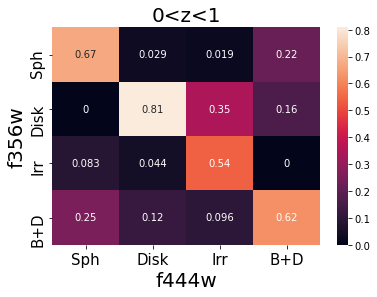

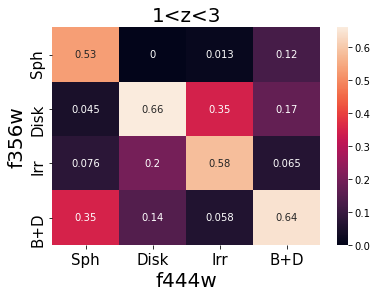

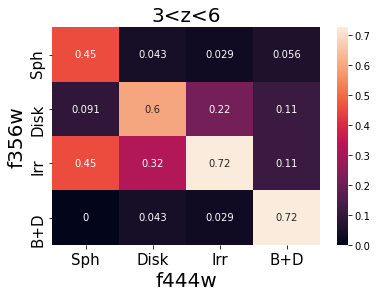

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("rb_synth_Mass_me_solar_exp>9.5 and rb_z>"+str(zlow)+"and rb_z<"+str(zup))


    cm = confusion_matrix(sel.morph_flag_f356, sel.morph_flag_f444,normalize='pred')
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Sph","Disk","Irr"])


    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('f444w',fontsize=20);ax.set_ylabel('f356w',fontsize=20); 
    #ax.set_title('Confusion Matrix'); 
    ax.set_title(str(zlow)+"<z<"+str(zup),fontsize=20)
    ax.xaxis.set_ticklabels(["Sph","Disk","Irr","B+D"],fontsize=15); ax.yaxis.set_ticklabels(["Sph","Disk","Irr","B+D"],fontsize=15);
    plt.show()
    #disp.ax_.set(title='Sklearn Confusion Matrix with labels!!', xlabel='Predicted Fruits', ylabel='Actual Fruits')
    #disp.plot()

[189 165  84  59  33  16]
[507 330 212 101  60  11]
[495 290 165  71  48  11]
[271 204  85  37  19   6]
[36 64 41 13 11  0]


<ipython-input-20-7cde52abede9>:29: RuntimeWarning: invalid value encountered in divide
  plt.plot(bcenters,sph/all,color='red',linewidth=3)
<ipython-input-20-7cde52abede9>:30: RuntimeWarning: invalid value encountered in divide
  plt.plot(bcenters,dk/all,color='blue',linewidth=3)


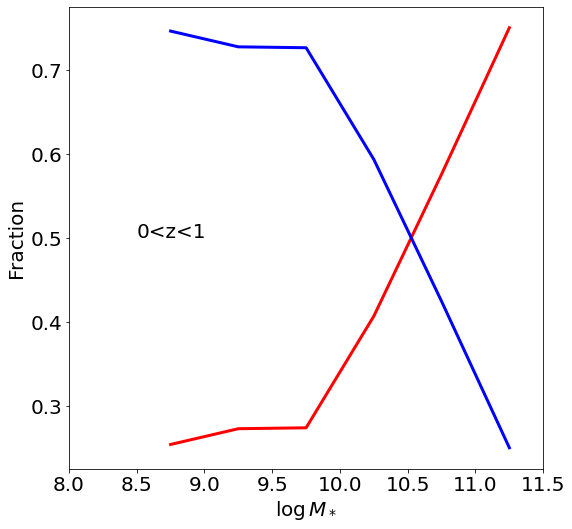

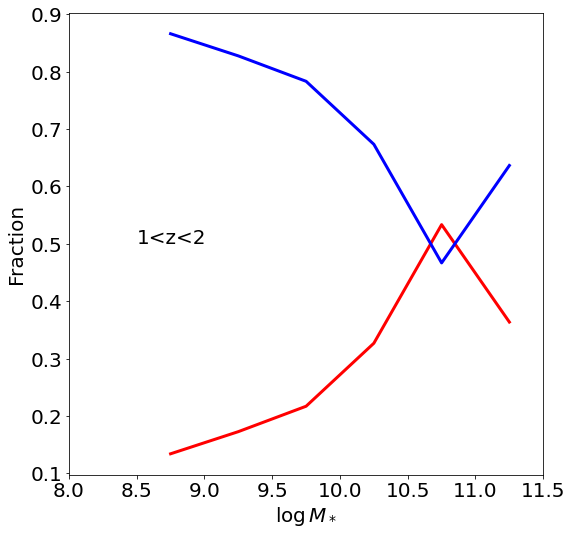

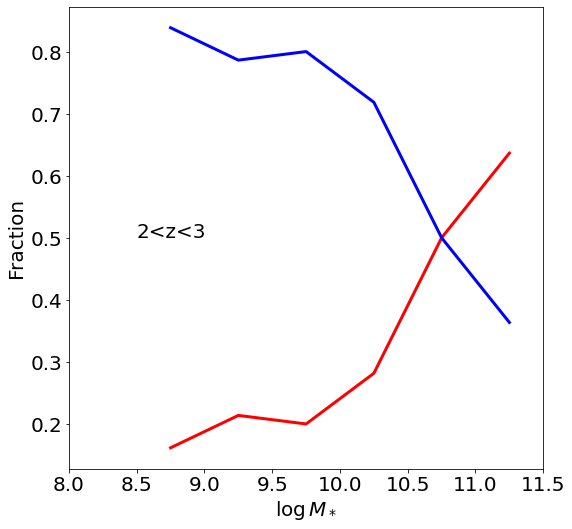

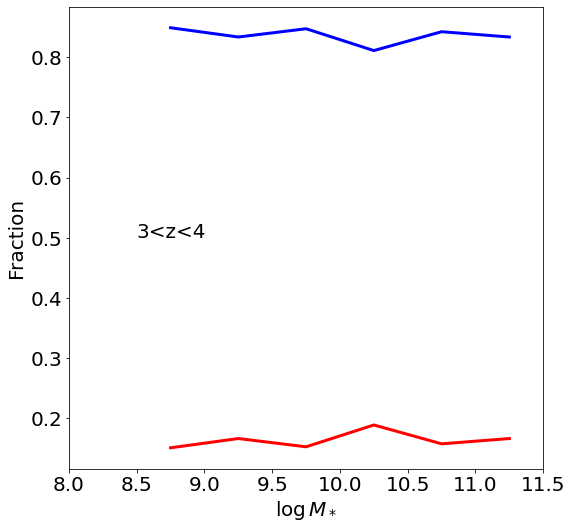

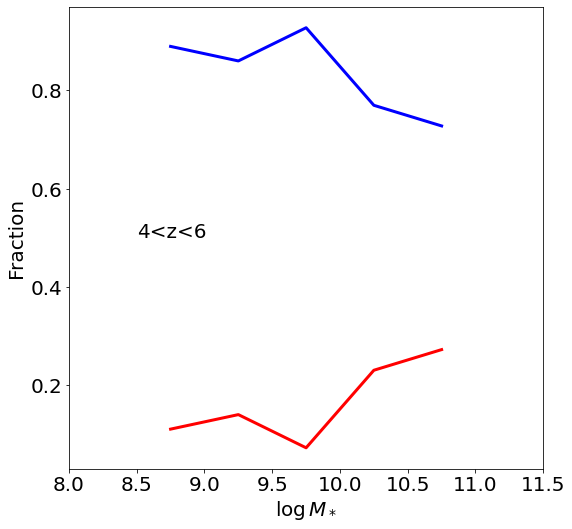

In [20]:
zbins = [0,1,2,3,4,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("rb_z>"+str(zlow)+"and rb_z<"+str(zup))

    mass=sel['rb_synth_Mass_me_solar_exp']
    zbest = sel["rb_z"]
    morph_flag = sel.morph_flag_f200

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    #plt.xlim(0,6)
    plt.xlim(8,11.5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    all,bins = np.histogram(mass,range=(8.5,11.5),bins=6)
    sph,bins = np.histogram(mass[(morph_flag==0)|(morph_flag==3)],range=(8.5,11.5),bins=6)
    dk,bins = np.histogram(mass[((morph_flag==1) |(morph_flag==2))],range=(8.5,11.5),bins=6)
    #irr,bins = np.histogram(logmass[(morph_flag==2)],range=(8.5,11),bins=4)
    #bd,bins = np.histogram(logmass[(morph_flag==3)],range=(8.5,11),bins=4)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    plt.plot(bcenters,sph/all,color='red',linewidth=3)
    plt.plot(bcenters,dk/all,color='blue',linewidth=3)
    #plt.plot(bcenters,irr/all,color='green',linewidth=3)
    #plt.plot(bcenters,bd/all,color='orange',linewidth=3)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    plt.text(8.5,0.5,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$\log M_*$",fontsize=20)
    plt.ylabel("Fraction",fontsize=20)
    #plt.savefig(data_path+"morph_frac_"+str(zlow)+"f200.png")
    

[189 165  84  59  33  16]
[0.02736282 0.06217177 0.06156634 0.1158936  0.06060606 0.27214054]
[0.05729327 0.1075252  0.12890985 0.22308945 0.18181818 0.60285946]
[1004  623  378  172  108   22]
[0.01021747 0.01097548 0.02943655 0.08512268 0.22706273 0.05763405]
[0.01767097 0.02112725 0.04992853 0.13580755 0.32849283 0.21509322]
[308 269 126  50  30   6]
[0.01679082 0.01027484 0.02817865 0.02535898 0.14514162 0.        ]
[0.03515723 0.02689988 0.06705944 0.09464102 0.32152504 0.33333333]


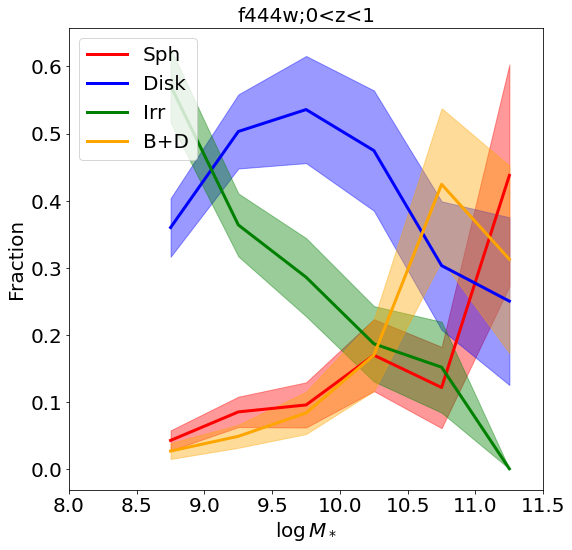

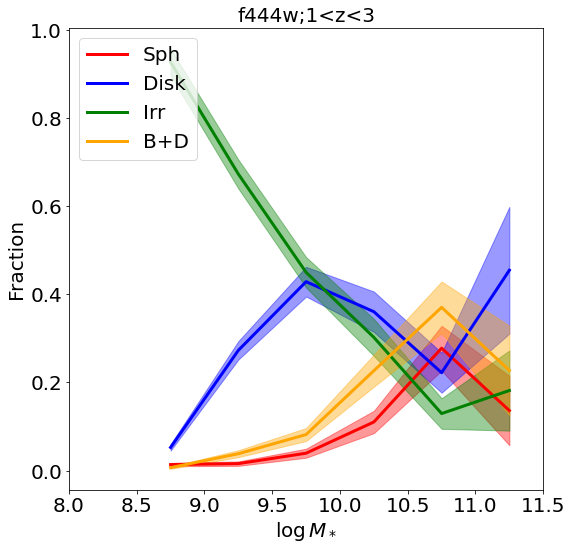

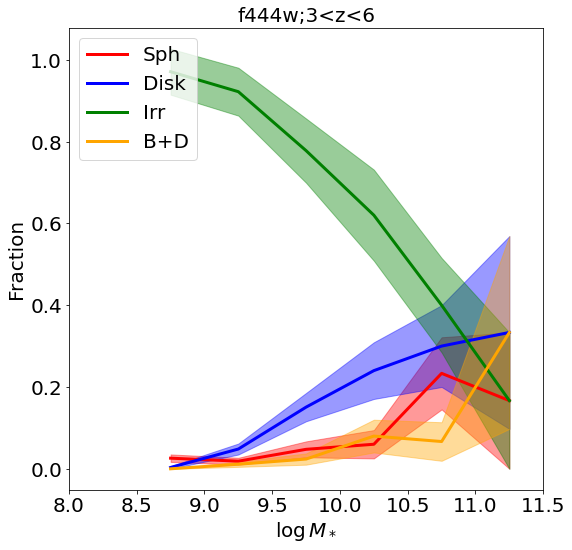

In [61]:
zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("rb_z>"+str(zlow)+"and rb_z<"+str(zup))

    mass=sel['rb_synth_Mass_me_solar_exp']
    zbest = sel["rb_z"]
    morph_flag = sel.morph_flag_f444w

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    #plt.xlim(0,6)
    plt.xlim(8,11.5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    all,bins = np.histogram(mass,range=(8.5,11.5),bins=6)
    sph,bins = np.histogram(mass[(morph_flag==0)],range=(8.5,11.5),bins=6)
    dk,bins = np.histogram(mass[((morph_flag==1))],range=(8.5,11.5),bins=6)
    irr,bins = np.histogram(mass[(morph_flag==2)],range=(8.5,11.5),bins=6)
    bd,bins = np.histogram(mass[(morph_flag==3)],range=(8.5,11.5),bins=6)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    plt.plot(bcenters,sph/all,color='red',linewidth=3,label="Sph")
    print((sph-np.sqrt(sph))/all)
    print((sph+np.sqrt(sph))/all)
    plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='red',alpha=0.4)
    plt.plot(bcenters,dk/all,color='blue',linewidth=3,label="Disk")
    plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='blue',alpha=0.4)
    plt.plot(bcenters,irr/all,color='green',linewidth=3,label="Irr")
    plt.fill_between(bcenters,(irr-np.sqrt(irr))/all, (irr+np.sqrt(irr))/all,color='green',alpha=0.4)
    plt.plot(bcenters,bd/all,color='orange',linewidth=3,label="B+D")
    plt.fill_between(bcenters,(bd-np.sqrt(bd))/all, (bd+np.sqrt(bd))/all,color='orange',alpha=0.4)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    #plt.text(9.5,0.8,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$\log M_*$",fontsize=20)
    plt.ylabel("Fraction",fontsize=20)
    plt.title("f444w;"+str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.legend(fontsize=20,loc='upper left')
    #plt.savefig(data_path+"morph_frac_"+str(zlow)+"f444.png")
    

[189 165  84  59  33  16]
[0.08215801 0.11032829 0.08140146 0.1885935  0.10759122 0.3232233 ]
[0.1294822  0.16845958 0.15669378 0.31988107 0.25604514 0.6767767 ]
[1004  623  378  172  108   22]
[0.03354128 0.02778424 0.04107901 0.12676656 0.25236516 0.12563327]
[0.04614    0.04284176 0.0647411  0.18718693 0.35874595 0.32891218]
[308 269 126  50  30   6]
[0.03896104 0.01922518 0.02817865 0.08708497 0.17238576 0.        ]
[0.06493506 0.04025438 0.06705944 0.19291503 0.36094757 0.33333333]


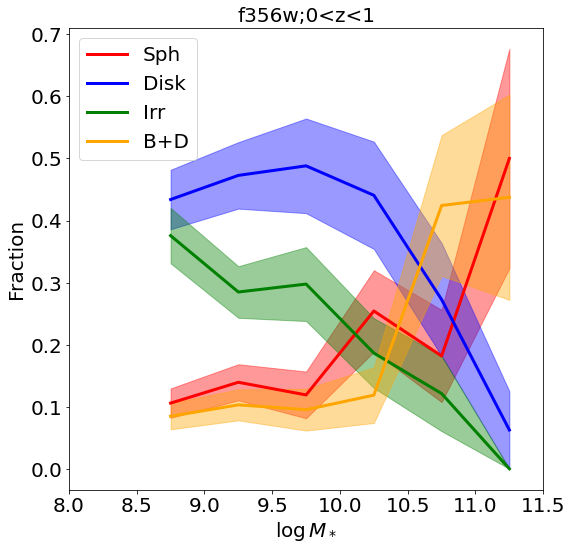

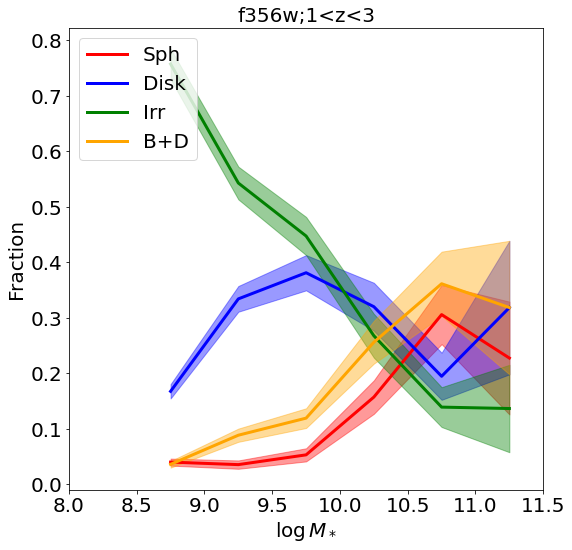

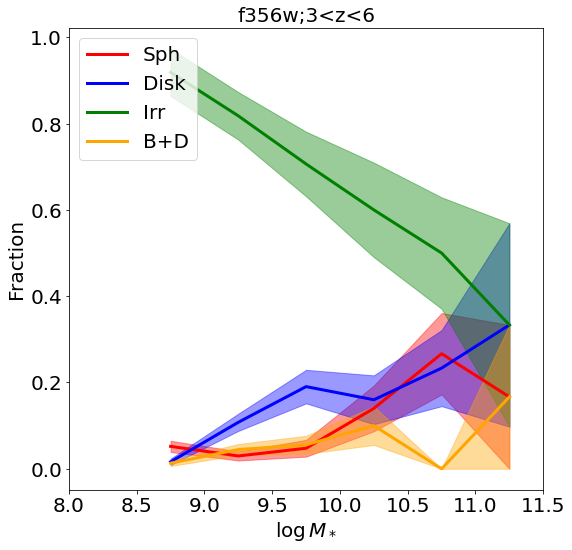

In [62]:
zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("rb_z>"+str(zlow)+"and rb_z<"+str(zup))

    mass=sel['rb_synth_Mass_me_solar_exp']
    zbest = sel["rb_z"]
    morph_flag = sel.morph_flag_f356w

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    #plt.xlim(0,6)
    plt.xlim(8,11.5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    all,bins = np.histogram(mass,range=(8.5,11.5),bins=6)
    sph,bins = np.histogram(mass[(morph_flag==0)],range=(8.5,11.5),bins=6)
    dk,bins = np.histogram(mass[((morph_flag==1))],range=(8.5,11.5),bins=6)
    irr,bins = np.histogram(mass[(morph_flag==2)],range=(8.5,11.5),bins=6)
    bd,bins = np.histogram(mass[(morph_flag==3)],range=(8.5,11.5),bins=6)
    #bd,bins = np.histogram(logmass[(morph_flag==3)],range=(8.5,11),bins=4)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    plt.plot(bcenters,sph/all,color='red',linewidth=3,label="Sph")
    print((sph-np.sqrt(sph))/all)
    print((sph+np.sqrt(sph))/all)
    plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='red',alpha=0.4)
    plt.plot(bcenters,dk/all,color='blue',linewidth=3,label="Disk")
    plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='blue',alpha=0.4)
    plt.plot(bcenters,irr/all,color='green',linewidth=3,label="Irr")
    plt.fill_between(bcenters,(irr-np.sqrt(irr))/all, (irr+np.sqrt(irr))/all,color='green',alpha=0.4)
    plt.plot(bcenters,bd/all,color='orange',linewidth=3,label="B+D")
    plt.fill_between(bcenters,(bd-np.sqrt(bd))/all, (bd+np.sqrt(bd))/all,color='orange',alpha=0.4)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    #plt.text(8.5,0.5,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$\log M_*$",fontsize=20)
    plt.ylabel("Fraction",fontsize=20)
    #plt.title("f356w",fontsize=20)
    plt.title("f356w;"+str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.legend(fontsize=20,loc='upper left')
    plt.savefig(data_path+"morph_frac_"+str(zlow)+"f356.png")
    

[189 165  84  59  33  16]
[0.08686468 0.08337794 0.03290395 0.14467624 0.13194693 0.3232233 ]
[0.13535754 0.13480388 0.08614367 0.26210342 0.29229549 0.6767767 ]
[1004  623  378  172  108   22]
[0.11717349 0.0868796  0.06728105 0.10583819 0.16855712 0.12563327]
[0.13979862 0.11215732 0.09674012 0.16160367 0.25736881 0.32891218]
[308 269 126  50  30   6]
[0.13937965 0.10811866 0.06774523 0.07101021 0.06666667 0.        ]
[0.18529567 0.15210439 0.12273097 0.16898979 0.2        0.        ]


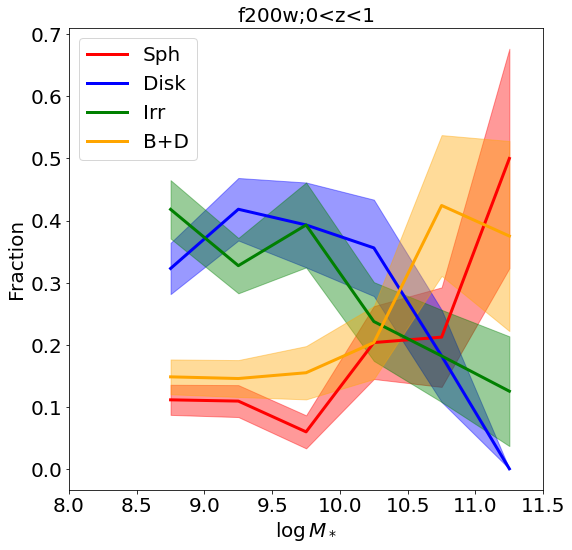

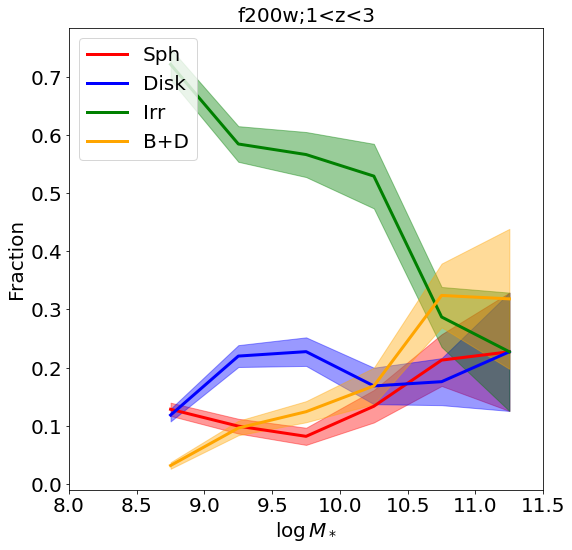

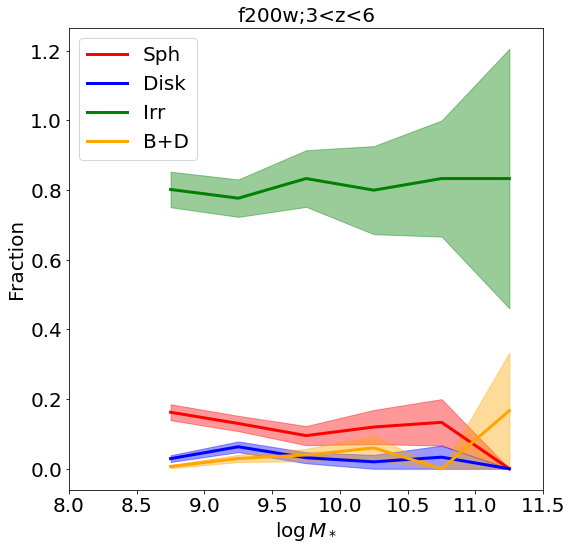

In [63]:
zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = ceers_cat.query("rb_z>"+str(zlow)+"and rb_z<"+str(zup))

    mass=sel['rb_synth_Mass_me_solar_exp']
    zbest = sel["rb_z"]
    morph_flag = sel.morph_flag_f200w

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    #plt.xlim(0,6)
    plt.xlim(8,11.5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    all,bins = np.histogram(mass,range=(8.5,11.5),bins=6)
    sph,bins = np.histogram(mass[(morph_flag==0)],range=(8.5,11.5),bins=6)
    dk,bins = np.histogram(mass[((morph_flag==1))],range=(8.5,11.5),bins=6)
    irr,bins = np.histogram(mass[(morph_flag==2)],range=(8.5,11.5),bins=6)
    bd,bins = np.histogram(mass[(morph_flag==3)],range=(8.5,11.5),bins=6)
    #bd,bins = np.histogram(logmass[(morph_flag==3)],range=(8.5,11),bins=4)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    plt.plot(bcenters,sph/all,color='red',linewidth=3,label="Sph")
    print((sph-np.sqrt(sph))/all)
    print((sph+np.sqrt(sph))/all)
    plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='red',alpha=0.4)
    plt.plot(bcenters,dk/all,color='blue',linewidth=3,label="Disk")
    plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='blue',alpha=0.4)
    plt.plot(bcenters,irr/all,color='green',linewidth=3,label="Irr")
    plt.fill_between(bcenters,(irr-np.sqrt(irr))/all, (irr+np.sqrt(irr))/all,color='green',alpha=0.4)
    plt.plot(bcenters,bd/all,color='orange',linewidth=3,label="B+D")
    plt.fill_between(bcenters,(bd-np.sqrt(bd))/all, (bd+np.sqrt(bd))/all,color='orange',alpha=0.4)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    #plt.text(8.5,0.5,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$\log M_*$",fontsize=20)
    plt.ylabel("Fraction",fontsize=20)
    #plt.title("f356w",fontsize=20)
    plt.title("f200w;"+str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.legend(fontsize=20,loc='upper left')
    plt.savefig(data_path+"morph_frac_"+str(zlow)+"f356.png")
    

Candels - CEERS

[156 154  74  52  29  16]
[124 314 326 161 104  21]
[ 2 10 27 11 12  4]


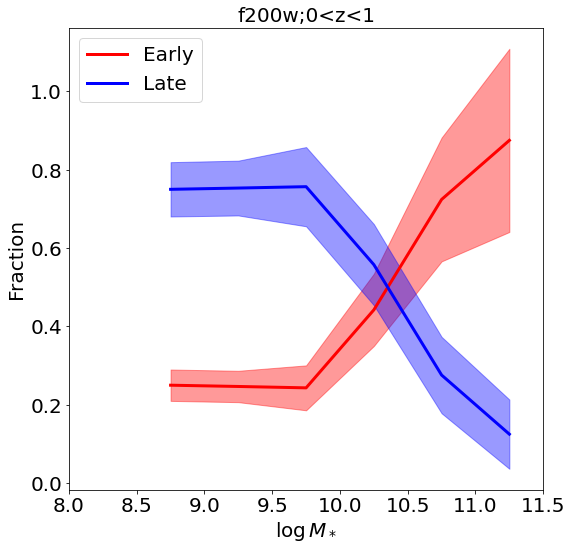

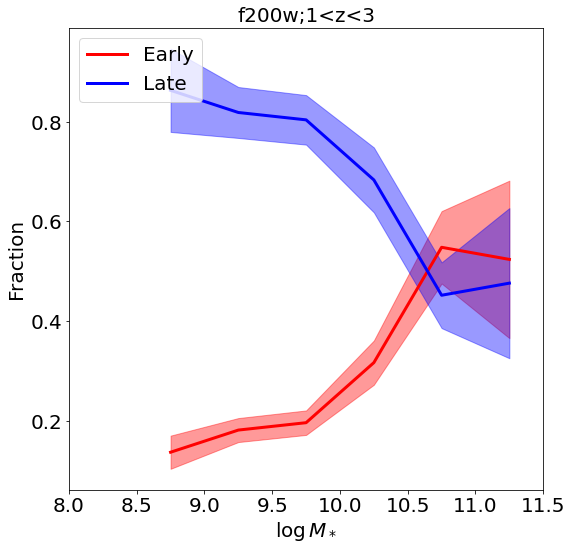

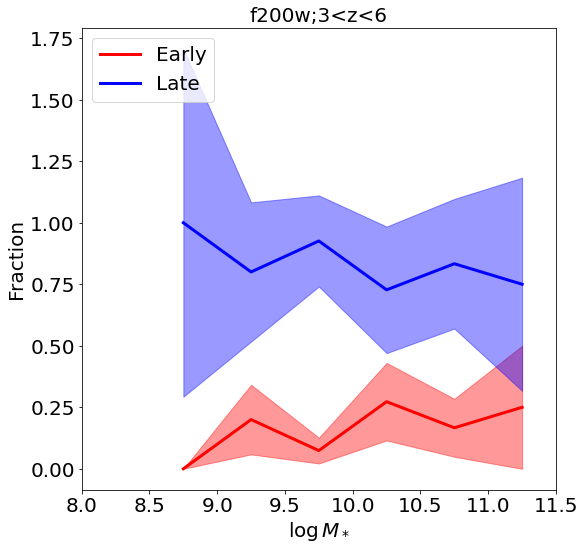

In [67]:
zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = candels_ceers.query("rb_z>"+str(zlow)+"and rb_z<"+str(zup))

    mass=sel['rb_synth_Mass_me_solar_exp']
    zbest = sel["rb_z"]
    morph_flag = sel.morph_flag_f200w

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(8.5, 8.5)
    #plt.xlim(0,6)
    plt.xlim(8,11.5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    all,bins = np.histogram(mass,range=(8.5,11.5),bins=6)
    sph,bins = np.histogram(mass[(morph_flag==0)|(morph_flag==3)],range=(8.5,11.5),bins=6)
    dk,bins = np.histogram(mass[((morph_flag==1) |(morph_flag==2))],range=(8.5,11.5),bins=6)
    #irr,bins = np.histogram(logmass[(morph_flag==2)],range=(8.5,11),bins=4)
    #bd,bins = np.histogram(logmass[(morph_flag==3)],range=(8.5,11),bins=4)
    #dirr,bins = np.histogram(logmass[(morph_flag==1.5)],range=(8.5,11),bins=4)

    bcenters = (bins[1:] + bins[:-1])/2
    
    print(all)

    plt.plot(bcenters,sph/all,color='red',linewidth=3,label="Early")
    plt.fill_between(bcenters,(sph-np.sqrt(sph))/all, (sph+np.sqrt(sph))/all,color='red',alpha=0.4)
    plt.plot(bcenters,dk/all,color='blue',linewidth=3,label="Late")
    plt.fill_between(bcenters,(dk-np.sqrt(dk))/all, (dk+np.sqrt(dk))/all,color='blue',alpha=0.4)
    #plt.plot(bcenters,irr/all,color='green',linewidth=3)
    #plt.plot(bcenters,bd/all,color='orange',linewidth=3)
    #plt.plot(bcenters,dirr/all,color='blue',linewidth=3,ls='--')
    #plt.text(8.5,0.5,str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.xlabel("$\log M_*$",fontsize=20)
    plt.ylabel("Fraction",fontsize=20)
    plt.legend(fontsize=20,loc='upper left')
    plt.title("f200w;"+str(zlow)+"<z<"+str(zup),fontsize=20)
    plt.savefig(data_path+"morph_frac_"+str(zlow)+"f200_CANDELS-CEERS.png")

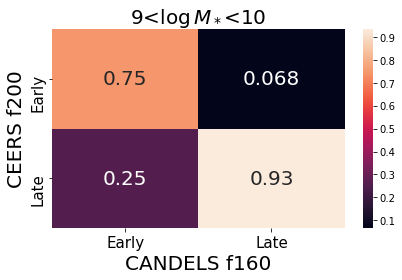

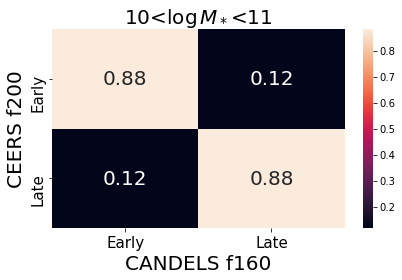

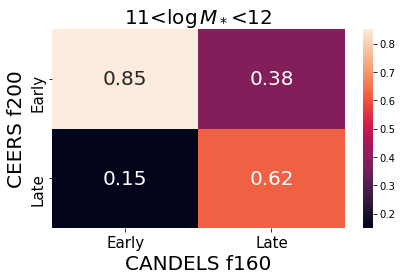

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


zbins = [9,10,11,12]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = candels_ceers.query("morph_CANDELS>=0 and rb_z<6 and rb_synth_Mass_me_solar_exp>"+str(zlow)+"and rb_synth_Mass_me_solar_exp<"+str(zup))


    ceers_morph = sel.morph_flag_f200w.values
    ceers_morph[ceers_morph==3]=0
    ceers_morph[ceers_morph==2]=1

    candels_morph = sel.morph_CANDELS.values
    candels_morph[candels_morph==3]=0
    candels_morph[candels_morph==2]=1

    cm = confusion_matrix(ceers_morph, candels_morph,normalize='pred')
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Sph","Disk","Irr"])


    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax,annot_kws={"size": 20});  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('CANDELS f160',fontsize=20);ax.set_ylabel('CEERS f200',fontsize=20); 
    #ax.set_title('Confusion Matrix'); 
    ax.set_title(str(zlow)+"<$\log M_*$<"+str(zup),fontsize=20)
    ax.xaxis.set_ticklabels(["Early","Late"],fontsize=15); ax.yaxis.set_ticklabels(["Early","Late"],fontsize=15);
    plt.tight_layout()
    plt.savefig(data_path+"conf_matrix_CANDELS_CEERS"+str(zlow)+"_mass_"+str(zup)+".png")
    plt.show()
    #disp.ax_.set(title='Sklearn Confusion Matrix with labels!!', xlabel='Predicted Fruits', ylabel='Actual Fruits')
    #disp.plot()

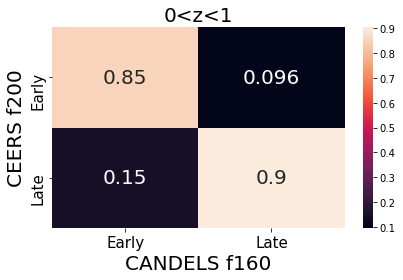

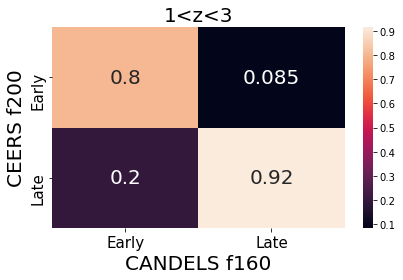

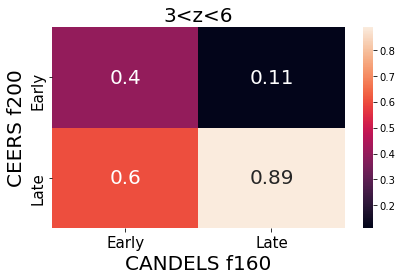

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


zbins = [0,1,3,6]

for zlow,zup in zip(zbins[:-1],zbins[1:]):
    sel = candels_ceers.query("morph_CANDELS>=0 and rb_synth_Mass_me_solar_exp>9 and rb_z>"+str(zlow)+"and rb_z<"+str(zup))


    ceers_morph = sel.morph_flag_f200w.values
    ceers_morph[ceers_morph==3]=0
    ceers_morph[ceers_morph==2]=1

    candels_morph = sel.morph_CANDELS.values
    candels_morph[candels_morph==3]=0
    candels_morph[candels_morph==2]=1

    cm = confusion_matrix(ceers_morph, candels_morph,normalize='pred')
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Sph","Disk","Irr"])


    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax,annot_kws={"size": 20});  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('CANDELS f160',fontsize=20);ax.set_ylabel('CEERS f200',fontsize=20); 
    #ax.set_title('Confusion Matrix'); 
    ax.set_title(str(zlow)+"<z<"+str(zup),fontsize=20)
    ax.xaxis.set_ticklabels(["Early","Late"],fontsize=15); ax.yaxis.set_ticklabels(["Early","Late"],fontsize=15)
    plt.tight_layout()
    plt.savefig(data_path+"conf_matrix_CANDELS_CEERS"+str(zlow)+"_z_"+str(zup)+".png")
    plt.show()
    #disp.ax_.set(title='Sklearn Confusion Matrix with labels!!', xlabel='Predicted Fruits', ylabel='Actual Fruits')
    #disp.plot()

In [ ]:
def scatter_hist(x, y, ax, ax_histx, ax_histy,lim_x,lim_y):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)
    ax_histx.tick_params(axis='y', labelsize=20)
    ax_histy.tick_params(axis='x', labelsize=20)

    # the scatter plot:
    ax.scatter(x, y,s=1,color='black')

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins_x= np.arange(-lim_x[0], lim_x[1] + binwidth, binwidth)
    bins_y= np.arange(-lim_y[0], lim_y[1] + binwidth, binwidth)
    ax_histx.hist(x, bins=bins_x,color='black')
    ax_histy.hist(y, bins=bins_y, orientation='horizontal',color='black')



fig = plt.figure()
fig.set_size_inches(8.5, 8.5)
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
plt.xlim(0,6)
plt.ylim(7,11)
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20, rotation=0)
plt.xlabel("$z_{phot}$",fontsize=20)
plt.ylabel("$\log M_*/M_\odot$",fontsize=20)
#ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
#ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
# Draw the scatter plot and marginals.
scatter_hist(ceers_cat.rb_z, ceers_cat.rb_synth_Mass_me_solar_exp, ax, ax_histx, ax_histy,[0,6],[7,11])



#plt.scatter(ceers_cat.rb_z,ceers_cat.rb_synth_Mass_me_solar_exp,s=1,color='black')
#plt.tight_layout()
plt.savefig(data_path+"mass_z.png",bbox_inches='tight')